# Actividad: Redes Neuronales Profundas 
## Tania Sayuri Guizado Hernández A01640092

*Importar TensorFlow*

In [1]:
# Se cargan las librerias necesarias
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

*Descargamos el dataset de Fashion MNIST*

In [2]:
# Se cargan los datos de Fashion MNIST
(train_images, train_labels),(test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalizamos los valores de los pixeles entre 0 y 1
train_images, test_images = train_images/255.0, test_images/255.0

*Se crea una función para visualizar las imágenes*

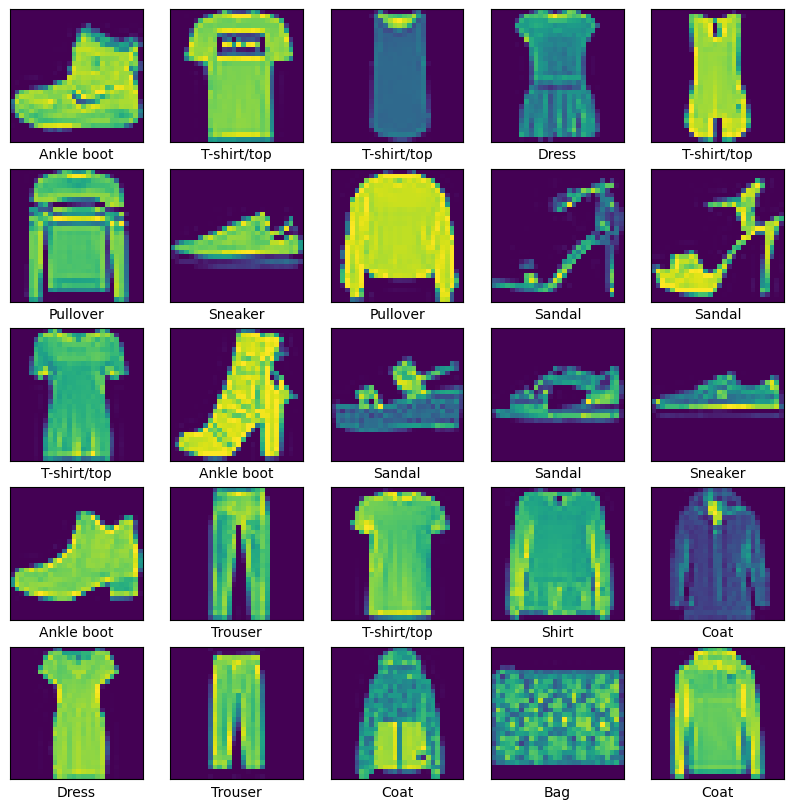

In [3]:
# Se guarda el nombre de las clases
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
               'Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

*Capas de convolución*

In [4]:
# Se crea la red neuronal
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

*Arquitectura*

In [5]:
# Visualizamos la arquitectura de la red neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

*Capas densas*

In [6]:
# Se agregan las capas densas
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# Visualizamos la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

*Compilación y entrenamiento*

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10


D:\Anaconda\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 55s 28ms/step - loss: 0.5424 - accuracy: 0.8017 - val_loss: 0.4383 - val_accuracy: 0.8401
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3630 - accuracy: 0.8659 - val_loss: 0.3822 - val_accuracy: 0.8598
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3036 - accuracy: 0.8874 - val_loss: 0.3352 - val_accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2675 - accuracy: 0.9018 - val_loss: 0.3209 - val_accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2376 - accuracy: 0.9114 - val_loss: 0.3078 - val_accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2128 - accuracy: 0.9204 - val_loss: 0.3133 - val_accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1919 - accuracy: 0.9285 - val_loss: 0.3153 - val_accura

*Evaluacion*

313/313 - 1s - loss: 0.3425 - accuracy: 0.8904 - 1s/epoch - 5ms/step


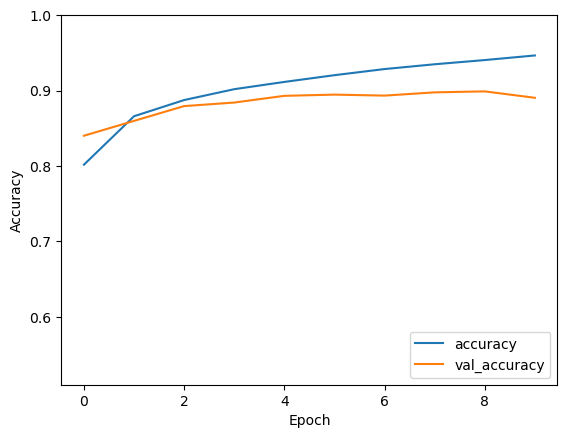

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.510,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

*Se imprime el accuracy obteniendo un 0.8903 como resultado*

In [10]:
print(test_acc)

0.8903999924659729


Predicción

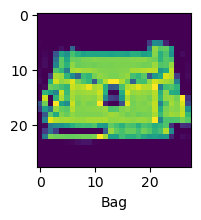

In [13]:
n = 95 # Número de imagen

plt.figure(figsize=(2,2))
plt.imshow(test_images[n])
plt.xlabel(class_names[test_labels[n]])
plt.show()

In [14]:
predictions = model.predict(test_images)
print(predictions[n])

import numpy as np
print('La imagen pertenece al grupo {} con una probalididad de {:.2f}%'
      .format(class_names[np.argmax(predictions[n])], 100*np.max(predictions[n])))

313/313 [==============================] - 2s 5ms/step
[3.4382434e-11 5.5273957e-15 1.4607154e-13 3.3648956e-17 2.4720974e-16
 7.1447297e-12 1.4978681e-12 1.5674007e-12 1.0000000e+00 1.1950373e-14]
La imagen pertenece al grupo Bag con una probalididad de 100.00%
